In [1]:
#import libaries
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Step 1: Get the dataset
we will use the netfxlix stock dataset raging from jan 2015 to Jan 2025. The dataset will be obatined from yahoo finance

In [2]:
# Step 1: Fetch Netflix stock data
stock_data = yf.download('NFLX', start='2015-01-01', end='2025-01-01')


[*********************100%***********************]  1 of 1 completed


In [3]:
#print the first five rows in the dataset
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2015-01-02,49.848572,50.331429,48.731430,49.151428,13475000
2015-01-05,47.311428,49.258572,47.147144,49.258572,18165000
2015-01-06,46.501431,47.639999,45.661430,47.347141,16037700
2015-01-07,46.742859,47.421429,46.271427,47.347141,9849700
2015-01-08,47.779999,47.835712,46.478573,47.119999,9601900


#Step 2: Do some data pre-processing

In [4]:
# Predict next day's closing price i.e show the next days closing price
stock_data['Target'] = stock_data['Close'].shift(-1)
stock_data.head()

Price,Close,High,Low,Open,Volume,Target
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,
Date,,,,,,
2015-01-02,49.848572,50.331429,48.731430,49.151428,13475000,47.311428
2015-01-05,47.311428,49.258572,47.147144,49.258572,18165000,46.501431
2015-01-06,46.501431,47.639999,45.661430,47.347141,16037700,46.742859
2015-01-07,46.742859,47.421429,46.271427,47.347141,9849700,47.779999
2015-01-08,47.779999,47.835712,46.478573,47.119999,9601900,47.041428


In [5]:
# Step 2: Feature selection and preprocessing
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = stock_data[features].iloc[:-1]  # Exclude last row (NaN in 'Target')
target = stock_data['Target'].iloc[:-1]

In [6]:
#check for null values
data.isnull().sum()
#display the number of null values
print(data.isnull().sum())

Price   Ticker
Open    NFLX      0
High    NFLX      0
Low     NFLX      0
Close   NFLX      0
Volume  NFLX      0
dtype: int64


In [7]:
#check the shape of the data
data.shape

(2515, 5)

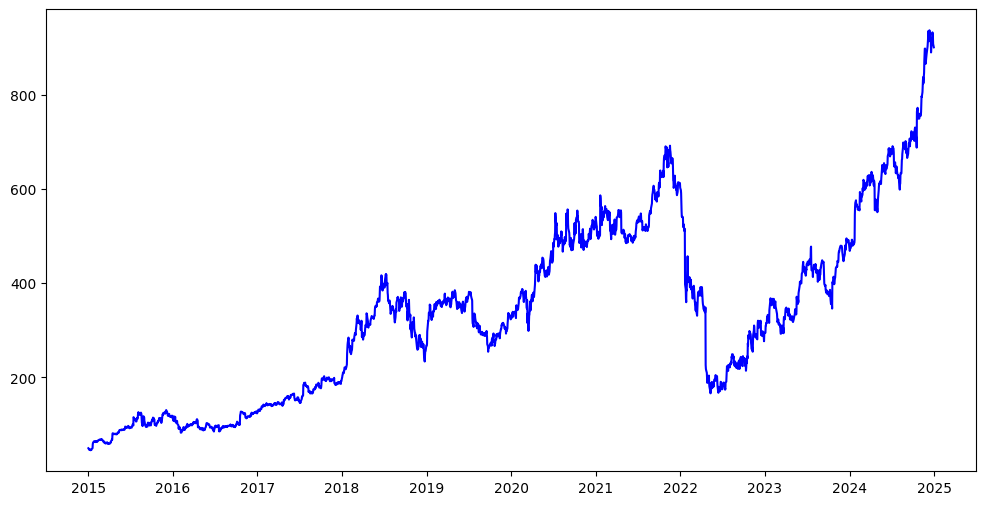

In [8]:
#visualize the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Netflix Stock Price', color='blue')

In [9]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=False)


In [10]:
#check the shapes of training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2012, 5)
X_test shape: (503, 5)
y_train shape: (2012,)
y_test shape: (503,)


#Step 3: create the model and train the model

In [12]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#Step 4: Evaluate the model
**Root Mean Squared Error:** Root Mean Squared Error (RMSE) is a standard statistical measure used to evaluate the accuracy of predictions in regression models. It calculates the average magnitude of the errors between the predicted values and the actual values  with a particular emphasis on larger errors due to squaring.

**Mean Absolute Error (MAE)** is a metric used to measure the average magnitude of errors between predicted values and actual values  in regression models. It calculates the average of the absolute differences between the predictions and the true values, providing a straightforward and intuitive measure of error.

In [13]:
# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 10.824423553285682


In [18]:
from sklearn.metrics import mean_absolute_error

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 7.563014902723267


#Step 5: Predict the next days price using the model (Inference)

In [14]:
# Make predictions
future_data = stock_data[features].iloc[-1:].values  # Latest features
next_day_price = model.predict(future_data)
print(f"Predicted next day's price: {next_day_price[0]}")


Predicted next day's price: 891.2075042540304


#Step 6: Visualize how the model performed on the test set aganist the ground truth

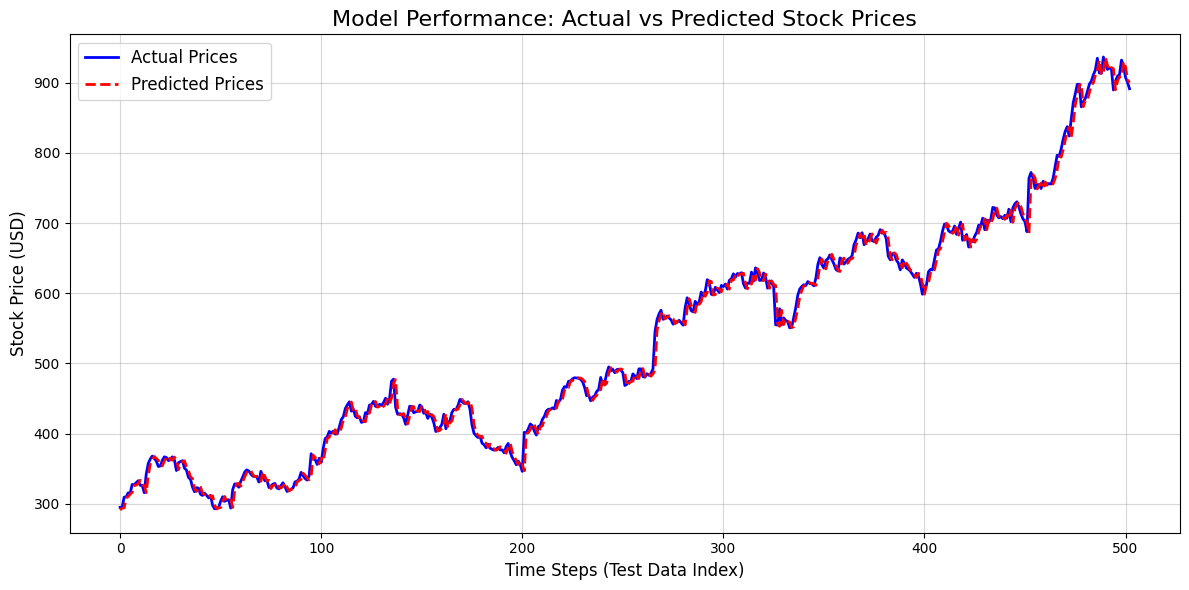

In [15]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values based on the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--', linewidth=2)

# Add labels and legend
plt.title("Model Performance: Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Time Steps (Test Data Index)", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()
